<a href="https://colab.research.google.com/github/QuothTheRaven42/learning_files/blob/master/perceptron_with_iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
# print(f'URL: {s}')
df  = pd.read_csv(s,
                  header=None,
                  encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
import numpy as np

class Perceptron(object):
    '''Perceptron classifier

    Parameters
    -------------
    eta : float
        Learning rate (between 0.0 and 1.0)

    n_iter : int
        Passes over trainng dataset

    random_state : int
        Random number generator seed for random weight initialization

    Attributes
    -------------
    w_ : 1d-array
        Weights after fitting

    errors_ : list
        Number of misclassifications (updates) in each epoch
    '''

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        '''Fit training data

        Paramenters
        -------------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, n_examples is number of examples
            and n_features is number of features

        y : array-like, shape = [n_examples]
            Target values

        Returns
        ---------
        self : object
        '''

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        '''Calculate net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.net_input(X) >= 0.0, 1, -1)




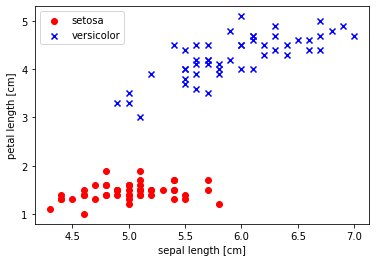

In [8]:
# select setosa/versicolor
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal len and petal len
X = df.iloc[:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


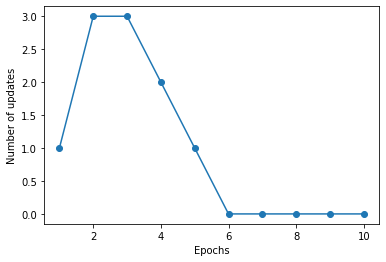

In [9]:
ppn = Perceptron(n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [16]:
# convenience func to visualize decision boundaries for 2D datasets
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # set up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(),
                                     xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

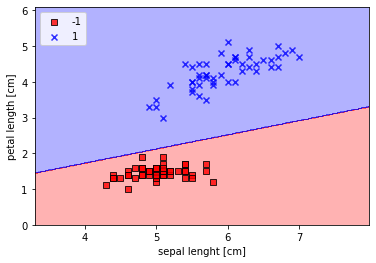

In [17]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()